# Simple survey analyzer template

This is a template for a simple analysis of a couple of survey dataset.


Note that the aim is not the efficency of the code, instead I've tried to make it easily readble and hopefully understandable in the mathematical and computational operations even for those with little knowledge in the field 

# Index
* [Imports](#imports)
* [Introduction](#introduction)
* [Import Data](#import)
    * [CSV](#csv)
    * [EXCEL](#excel)
* [Anonymization](#anonymization) - *not always necessary*
* [Post Anonimization](#post_anonymization)
    * [Categorical Data](#cat_data_management)
* [Exploration](#exploration)
    * [Numerical Data](#numerical)
    * [Categorical Data](#categorical)
    * [Subsetting](#subsetting)
* [Sentiment analysis](#sentiment) - *to be continued*

## Imports
<a id='imports'></a>

In [848]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from matplotlib.lines import Line2D # usefull for matplotlib legends customizazions 

## Introduction
<a id='introduction'></a>

Given a dataframe A with a structure like

In [849]:
example_data_A = {'User':['user0', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7', 'user8', 'user9'],
                'AlphanumericQuestion0':['a','a','b','b','c','c','c','a','b','a'],
                'NumericQuestion1':[1,3,5,2,4,2,2,2,3,5],
                'NimericQuestion2':[2,2,2,4,4,1,3,3,5,4],
                'NumericQuestion3':[3,5,5,1,2,1,1,2,1,1],
                'AlphanumericQuestion4':['all all','ball mall','bla bla','we are','you are','we are','call all', 'call ball','call','bla'],
               }
example_dataframe_A = pd.DataFrame(example_data_A)
example_dataframe_A

,User,AlphanumericQuestion0,NumericQuestion1,NimericQuestion2,NumericQuestion3,AlphanumericQuestion4
0,user0,a,1,2,3,all all
1,user1,a,3,2,5,ball mall
2,user2,b,5,2,5,bla bla
3,user3,b,2,4,1,we are
4,user4,c,4,4,2,you are
5,user5,c,2,1,1,we are
6,user6,c,2,3,1,call all
7,user7,a,2,3,2,call ball
8,user8,b,3,5,1,call
9,user9,a,5,4,1,bla


and a dataframe B with a structure like

In [850]:
example_data_B = {'User':['user0', 'user2', 'user1', 'user4', 'user3', 'user6', 'user5', 'user7', 'user8', 'user9'],
                'AlphanumericQuestion0':['a','b','b','b','c','c','c','a','b','a'],
                'NumericQuestion1':[1,2,4,2,4,1,4,2,3,5],
                'NimericQuestion5':[2,5,1,3,4,5,3,2,5,4],
                'NumericQuestion6':[3,1,4,4,2,1,4,2,2,1],
                'AlphanumericQuestion4':['all all','we mall','bla bla','we are','you are','we are','call all', 'call ball','call','bla'],
               }
example_dataframe_B = pd.DataFrame(example_data_B)
example_dataframe_B

,User,AlphanumericQuestion0,NumericQuestion1,NimericQuestion5,NumericQuestion6,AlphanumericQuestion4
0,user0,a,1,2,3,all all
1,user2,b,2,5,1,we mall
2,user1,b,4,1,4,bla bla
3,user4,b,2,3,4,we are
4,user3,c,4,4,2,you are
5,user6,c,1,5,1,we are
6,user5,c,4,3,4,call all
7,user7,a,2,2,2,call ball
8,user8,b,3,5,2,call
9,user9,a,5,4,1,bla


Note that we have a User column and some Question columns boht numerical and categorical.


We want to make a brief exploration of the two dataset and a brief comparison of the two, take in consideration that not all the Question are the same in the two database.

## Import data
<a id='import'></a>

In [851]:
database_A = example_dataframe_A
database_B = example_dataframe_B

### CSV
<a id='csv'></a>
Let's suppose that the data are in a csv file

In [852]:
# Uncomment the next lines and insert the path of the csv file instead of CSV_PATH
#database_A = pd.read_csv('CSV_PATH_A')
#database_B = pd.read_csv('CSV_PATH_B')

### Excel
<a id='excel'></a>
Let's suppose that the data are in a excel file

In [853]:
# Uncomment the next lines and insert the path of the excel file instead of EXCEL_PATH
#database_A = pd.read_excel('EXCEL_PATH_A', engine='openpyxl')
#database_B = pd.read_excel('EXCEL_PATH_B', engine='openpyxl')

## Anonymization
<a id='anonymization'></a>

If the User column contain sensible data maybe we want to anonymize the two database.


In this way we can still compare the values of the same user in the two database but during the exploration we will know nothing about the sensible data.


Note: if you do not need to anonymize data simply jump to [Post anonymization](#post_anonymization)  

In [854]:
# Let's encode the two Users colunmns with the same criteria
list_A_B_users = database_A['User'].to_list() + database_B['User'].to_list()
print(list_A_B_users)

encoded_users_AB, unique_users_AB = pd.factorize(list_A_B_users)
print('Encoded users:')
print(encoded_users_AB)
print('Clear users:')
print(database_A['User'])
print(database_B['User'])
print('Unique users:')
print(unique_users_AB)

['user0', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7', 'user8', 'user9', 'user0', 'user2', 'user1', 'user4', 'user3', 'user6', 'user5', 'user7', 'user8', 'user9']
Encoded users:
[0 1 2 3 4 5 6 7 8 9 0 2 1 4 3 6 5 7 8 9]
Clear users:
0    user0
1    user1
2    user2
3    user3
4    user4
5    user5
6    user6
7    user7
8    user8
9    user9
Name: User, dtype: object
0    user0
1    user2
2    user1
3    user4
4    user3
5    user6
6    user5
7    user7
8    user8
9    user9
Name: User, dtype: object
Unique users:
['user0' 'user1' 'user2' 'user3' 'user4' 'user5' 'user6' 'user7' 'user8'
 'user9']


In [855]:
anonymized_database_A = database_A
anonymized_database_B = database_B
anonymized_database_A['User'] = encoded_users_AB[:len(database_A['User'].to_list())]
anonymized_database_B['User'] = encoded_users_AB[len(database_A['User'].to_list()):]

In [856]:
anonymized_database_A

,User,AlphanumericQuestion0,NumericQuestion1,NimericQuestion2,NumericQuestion3,AlphanumericQuestion4
0,0,a,1,2,3,all all
1,1,a,3,2,5,ball mall
2,2,b,5,2,5,bla bla
3,3,b,2,4,1,we are
4,4,c,4,4,2,you are
5,5,c,2,1,1,we are
6,6,c,2,3,1,call all
7,7,a,2,3,2,call ball
8,8,b,3,5,1,call
9,9,a,5,4,1,bla


In [857]:
anonymized_database_B

,User,AlphanumericQuestion0,NumericQuestion1,NimericQuestion5,NumericQuestion6,AlphanumericQuestion4
0,0,a,1,2,3,all all
1,2,b,2,5,1,we mall
2,1,b,4,1,4,bla bla
3,4,b,2,3,4,we are
4,3,c,4,4,2,you are
5,6,c,1,5,1,we are
6,5,c,4,3,4,call all
7,7,a,2,2,2,call ball
8,8,b,3,5,2,call
9,9,a,5,4,1,bla


This point is of particoular importance if the next exploration passages will be executed by someone wich should not have access to the sensible data.

So someone with the authorizations to the sensible data will perform the anonymization and will give the anonymized data to the people that will perform the expolorations 

In [858]:
# Let's save the anonymized version of the two database
anonymized_database_A.to_csv('anonymized_database_A.csv')
anonymized_database_B.to_csv('anonymized_database_B.csv')

## Post anonymization
<a id='post_anonymization'></a>

For the actual purpose we do not need to compare the same user across the two database so we'll simply ignore the User column

In [859]:
partial_database_A = database_A.drop(['User'], axis=1)
partial_database_B = database_B.drop(['User'], axis=1)

In [860]:
database_A

,User,AlphanumericQuestion0,NumericQuestion1,NimericQuestion2,NumericQuestion3,AlphanumericQuestion4
0,0,a,1,2,3,all all
1,1,a,3,2,5,ball mall
2,2,b,5,2,5,bla bla
3,3,b,2,4,1,we are
4,4,c,4,4,2,you are
5,5,c,2,1,1,we are
6,6,c,2,3,1,call all
7,7,a,2,3,2,call ball
8,8,b,3,5,1,call
9,9,a,5,4,1,bla


In [861]:
partial_database_A

,AlphanumericQuestion0,NumericQuestion1,NimericQuestion2,NumericQuestion3,AlphanumericQuestion4
0,a,1,2,3,all all
1,a,3,2,5,ball mall
2,b,5,2,5,bla bla
3,b,2,4,1,we are
4,c,4,4,2,you are
5,c,2,1,1,we are
6,c,2,3,1,call all
7,a,2,3,2,call ball
8,b,3,5,1,call
9,a,5,4,1,bla


### Categorical Data 
<a id='cat_data_management'></a>
Let's suppose that we want to treat some of the columns as categorical data, pandas library provide us an apposite data type.
Let's convert the firsth column to cathegorical type

In [862]:
pd.Categorical(partial_database_A.iloc[:,0])

['a', 'a', 'b', 'b', 'c', 'c', 'c', 'a', 'b', 'a']
Categories (3, object): ['a', 'b', 'c']

In [863]:
partial_database_A.iloc[:,0] = pd.Categorical(partial_database_A.iloc[:,0])

## Exploration
<a id='exploration'></a>

### Numerical data
<a id='numerical'></a>

Global summary for each **numerical** column in database A

**Warning** in the next lines we will consider all the columns that have numerical values as numerical variables. 

If there are some columns in your dataset that are categorical but the values are numeric, be careful and remove these columns before applying of the subsequent rows.
Fore these columns you should apply the operations defined in [Categorical data](#categorical)

In [864]:
partial_database_A.describe()

,NumericQuestion1,NimericQuestion2,NumericQuestion3
count,10.00000,10.000000,10.000000
mean,2.90000,3.000000,2.200000
std,1.37032,1.247219,1.619328
min,1.00000,1.000000,1.000000
25%,2.00000,2.000000,1.000000
50%,2.50000,3.000000,1.500000
75%,3.75000,4.000000,2.750000
max,5.00000,5.000000,5.000000


Global summary for each **numerical** column in database B

In [865]:
partial_database_B.describe()

,NumericQuestion1,NimericQuestion5,NumericQuestion6
count,10.000000,10.000000,10.000000
mean,2.800000,3.400000,2.400000
std,1.398412,1.429841,1.264911
min,1.000000,1.000000,1.000000
25%,2.000000,2.250000,1.250000
50%,2.500000,3.500000,2.000000
75%,4.000000,4.750000,3.750000
max,5.000000,5.000000,4.000000


Global visual comparison

Text(0.5, 0.98, 'Global comparison database A B')

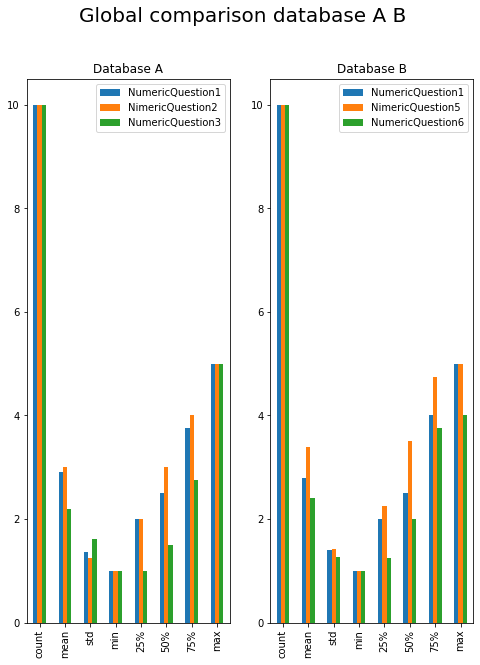

In [866]:
# Visual comparison of the summaries of the two database
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(len(\
                                    partial_database_A.describe().index.to_list()),\
                                    max(partial_database_A.describe().max().max(),\
                                       partial_database_B.describe().max().max())))

partial_database_A.describe().plot(kind = 'bar', title = 'Database A', ax = ax1)
partial_database_B.describe().plot(kind = 'bar', title = 'Database B', ax = ax2)

fig.suptitle('Global comparison database A B', fontsize=20)


Due to the different scale of each element maybe it's better provide a detailed visual comparison of the global informations of the two databases

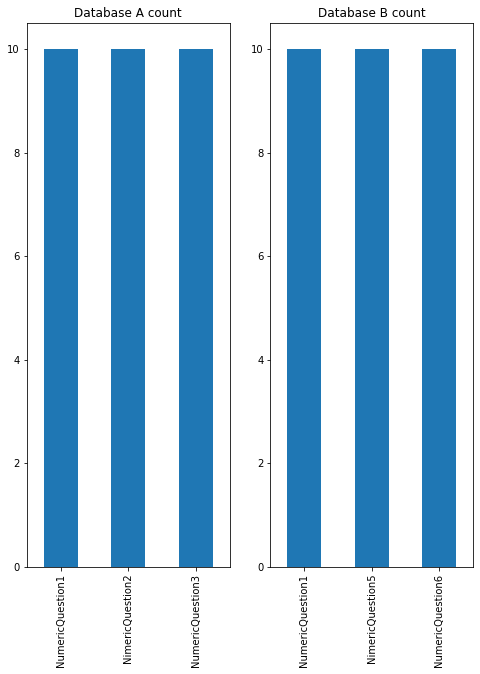

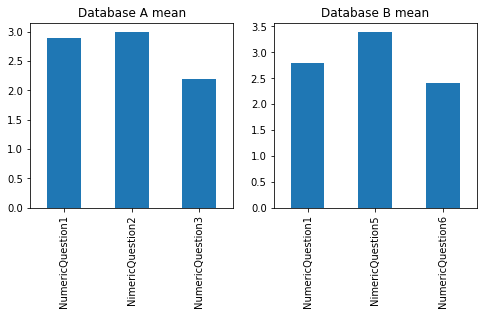

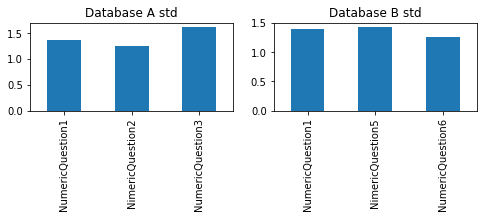

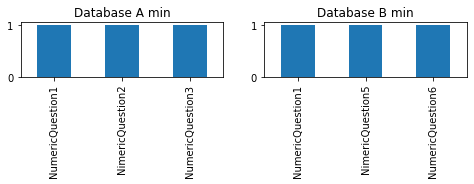

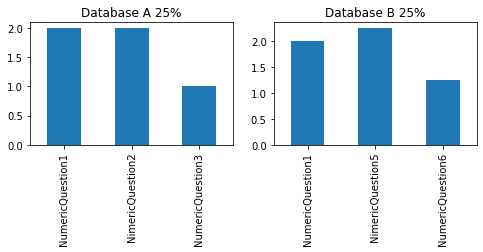

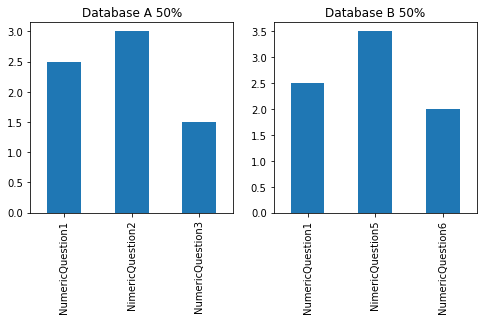

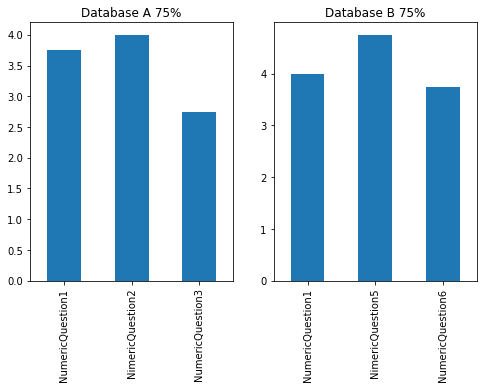

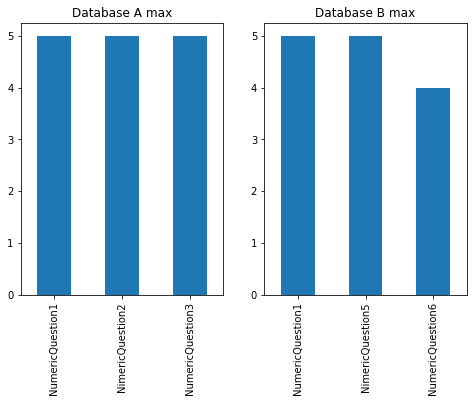

In [867]:
# Detailed visual comparison of the summaries of the two database
for column in partial_database_A.describe().index.to_list():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(len(\
                                    partial_database_A.describe().index.to_list()),\
                                    max(partial_database_A.describe().loc[column].max(),\
                                       partial_database_B.describe().loc[column].max())))

    partial_database_A.describe().loc[column].plot(kind = 'bar',\
                                                   title = f'Database A {column}', ax = ax1)
    partial_database_B.describe().loc[column].plot(kind = 'bar', \
                                                  title = f'Database B {column}', ax = ax2)


#### A better visualization for numerical data

An interesting usefull visualization summary of the previous data can be obained with violin plots

In [868]:
# Let's consider only numerical clumns

def extract_numerical_columns(dataframe):
    """
    Returns a dataframe that contains only numerical columns of the input dataframe
    """
    # Let's create a new data frame
    numerical_dataframe = dataframe.copy(deep=True)
    for column in dataframe.columns.to_list():
        if not numerical_dataframe[column].astype(str).str.isdigit().all():
            numerical_dataframe.pop(column)
    return numerical_dataframe

numerical_partial_database_A = extract_numerical_columns(partial_database_A)
numerical_partial_database_B = extract_numerical_columns(partial_database_B)


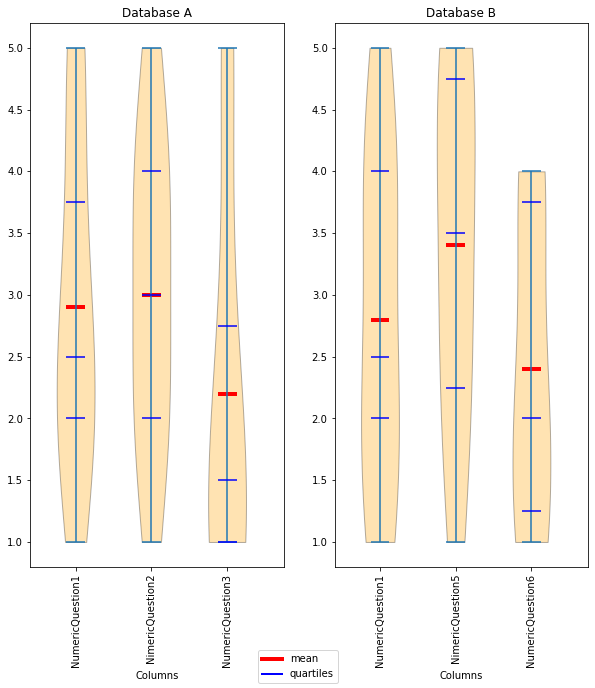

In [881]:
# Axes personalization
def set_axis_style(ax, labels):
    """
    Given a matplotlib ax and lables update ax
    """
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, rotation= 90)
    ax.set_xlim(0.40, len(labels) + 0.75)
    ax.set_xlabel('Columns')

# Violin plot personalization
def personalize_violinplots(dataframes, axes):
    """
    Given a dataframe list and a list of matplotlib axes 
    creates a violinplot using different colours of each relevant element
    """
    for index, ax in enumerate(axes):
        quantiles_matrix = np.array([0.25, 0.50, 0.75])*\
                                        np.ones(
                                            (len(dataframes[index].columns.to_list()),
                                             3))
        violin_parts = ax.violinplot(dataframes[index], 
                              showmeans=True, showmedians=False, showextrema=True, 
                              quantiles= quantiles_matrix.tolist())
        
        plt.setp(violin_parts['cmeans'], edgecolor='red',lw=4)
        plt.setp(violin_parts['cquantiles'], edgecolor='blue')
        plt.setp(violin_parts['bodies'], facecolor='orange', edgecolor='black')
 

# Figure definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(max(len(\
                                    numerical_partial_database_A.columns.to_list()), max(numerical_partial_database_A.describe().max().max(),\
                                       numerical_partial_database_A.describe().max().max())),\
                                    max(numerical_partial_database_A.describe().max().max(),\
                                       numerical_partial_database_A.describe().max().max())))


personalize_violinplots([numerical_partial_database_A, numerical_partial_database_B],
                        [ax1, ax2])

set_axis_style(ax1, numerical_partial_database_A.columns.to_list())
set_axis_style(ax2, numerical_partial_database_B.columns.to_list())
ax1.set_title('Database A')
ax2.set_title('Database B')

custom_legend = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_legend, ['mean', 'quartiles'], loc='lower center')

# Let's save the image
plt.savefig('ViolinDatasetABSummaryComparison.png', dpi=150)

Violin plots allow to have an idea of the distribution of the values, for a higher precision the plot present also a red line for the mean value and blu lines for the quartiles (25%, 50%, 75%).

### Categorical data
<a id='categorical'></a>

Once we have a real dataset, perhaps we can do some particular exploration and extract interesting insight. But for the moment, to keep the template generic, let's simply explore the frequencies of the categorical variables.

**Warning** If there are some "open answers" questions in your survey you should remove these columns before applying of the subsequent rows. Fore these columns you should apply the operations defined in [Senitment analysis](#sentiment)

In [870]:
# Let's consider only categorical variables
categorical_partial_database_A_columns = list(set(
                                                partial_database_A.columns.to_list()).difference(
                                                    set(numerical_partial_database_A.columns.to_list())))
categorical_partial_database_B_columns = list(set(
                                                partial_database_B.columns.to_list()).difference(
                                                    set(numerical_partial_database_B.columns.to_list())))

categorical_partial_database_A = partial_database_A[categorical_partial_database_A_columns]
categorical_partial_database_B = partial_database_B[categorical_partial_database_B_columns]
categorical_partial_database_A

,AlphanumericQuestion0,AlphanumericQuestion4
0,a,all all
1,a,ball mall
2,b,bla bla
3,b,we are
4,c,you are
5,c,we are
6,c,call all
7,a,call ball
8,b,call
9,a,bla


In [871]:
categorical_partial_database_B

,AlphanumericQuestion0,AlphanumericQuestion4
0,a,all all
1,b,we mall
2,b,bla bla
3,b,we are
4,c,you are
5,c,we are
6,c,call all
7,a,call ball
8,b,call
9,a,bla


**Dataset A**

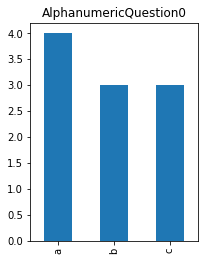

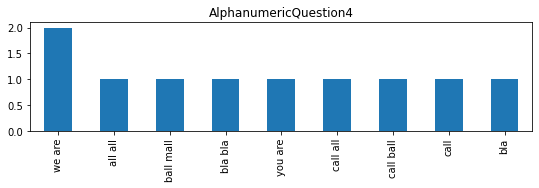

In [872]:
for column in categorical_partial_database_A.columns.to_list():
    frequencies_dataset = categorical_partial_database_A[column].value_counts()
    plt.figure(figsize=(frequencies_dataset.count(), frequencies_dataset.max()))   
    frequencies_dataset.plot(kind='bar', title=column)

**Dataset B**

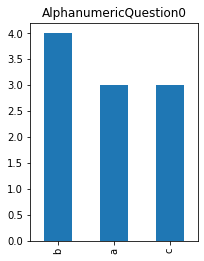

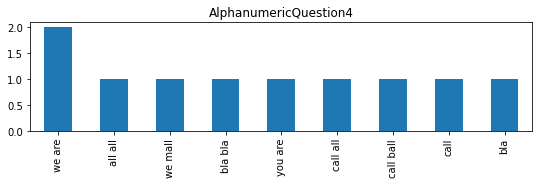

In [873]:
for column in categorical_partial_database_B.columns.to_list():
    frequencies_dataset = categorical_partial_database_B[column].value_counts()
    plt.figure(figsize=(frequencies_dataset.count(), frequencies_dataset.max()))   
    frequencies_dataset.plot(kind='bar', title=column)

If you have frequency target values for one of the categorical variables and would like to know if you have reached that target, the following lines are for you

In [874]:
target_frequencies = {'a':4, 'b':4, 'c':2, 'd':1}

In [875]:
# Actual frequencies of column 0
actual_frequencies = categorical_partial_database_A.iloc[:,0].value_counts()

# If you prefer spcify the column with the column name you can use the next commented line:
#actual_frequencies = categorical_partial_database_A['AlphanumericQuestion0'].value_counts()


In [876]:
labels = list(target_frequencies.keys())

percentages = []
# search for the values in target frequencies that are in actual frequencies
for target in labels:
    if target in actual_frequencies:
        percentages.append(actual_frequencies.loc[target]/
                                         target_frequencies[target] * 100)
    else:
        percentages.append(0)

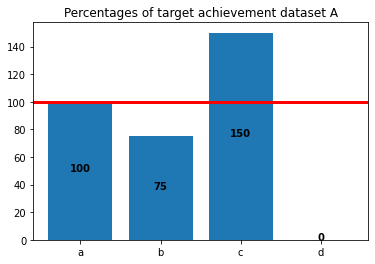

In [877]:
plt.bar(labels, percentages)
plt.title('Percentages of target achievement dataset A')
plt.axhline(y = 100, color = 'r', linestyle = '-', linewidth = 3)
#Adding percentage labels
for ind, perc in enumerate(percentages):
    plt.text(ind, perc//2, int(perc), ha = 'center', weight = 'bold')

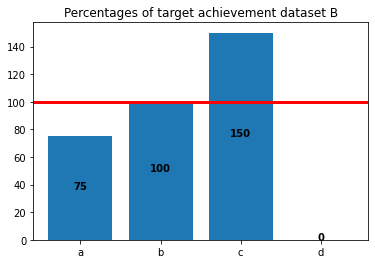

In [878]:
actual_frequencies = categorical_partial_database_B.iloc[:,0].value_counts()
labels = list(target_frequencies.keys())

percentages = []
# search for the values in target frequencies that are in actual frequencies
for target in labels:
    if target in actual_frequencies:
        percentages.append(actual_frequencies.loc[target]/
                                         target_frequencies[target] * 100)
    else:
        percentages.append(0)
        
plt.bar(labels, percentages)
plt.title('Percentages of target achievement dataset B')
plt.axhline(y = 100, color = 'r', linestyle = '-', linewidth = 3)
#Adding percentage labels
for ind, perc in enumerate(percentages):
    plt.text(ind, perc//2, int(perc), ha = 'center', weight = 'bold')

### Subsetting
<a id='subsetting'></a>

Let's suppose that you want to analyze the distribution of values of your numerical variables differentiated for each categorical values of a specific colum

**Dataset A**

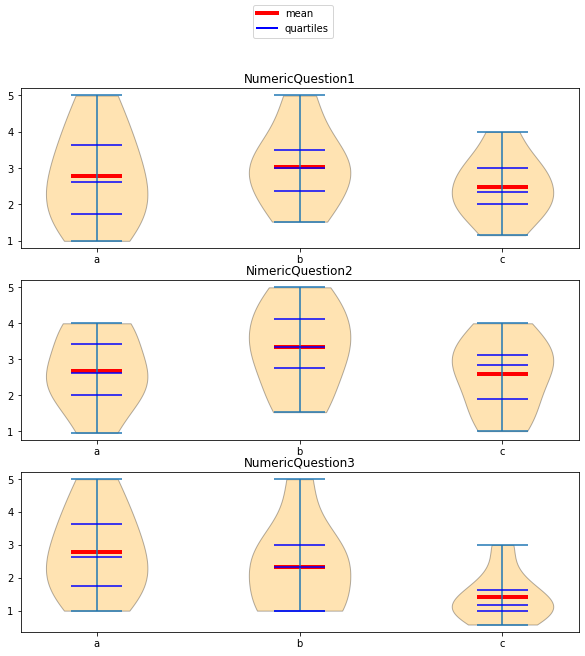

In [879]:
numerical_partial_database_A = extract_numerical_columns(partial_database_A)

# We want a plot for each numerical column
total_plots = len(list(numerical_partial_database_A.columns))

# We need to group data for the category and transpose the descriptive dataframe to proprerly plot it
databases = []
for column in numerical_partial_database_A.columns.to_list():
    databases.append(partial_database_A.groupby(['AlphanumericQuestion0'])\
                     [column].describe().transpose())

columns = numerical_partial_database_A.columns
    
# New Violin plot personalization
def personalize_violinplots_subset(dataframes, axes, titles):
    """
    Given a dataframe list and a list of matplotlib axes and titles
    creates a violinplot using different colours of each relevant element
    """
    for index, ax in enumerate(axes):
        quantiles_matrix = np.array([0.25, 0.50, 0.75])*\
                                        np.ones(
                                            (len(dataframes[index].columns.to_list()),
                                             3))
        violin_parts = ax.violinplot(dataframes[index], 
                              showmeans=True, showmedians=False, showextrema=True, 
                              quantiles= quantiles_matrix.tolist())
        
        plt.setp(violin_parts['cmeans'], edgecolor='red',lw=4)
        plt.setp(violin_parts['cquantiles'], edgecolor='blue')
        plt.setp(violin_parts['bodies'], facecolor='orange', edgecolor='black')
        ax.set_title(titles[index])
        # X lables position
        ax.set_xticks(range(1,len(dataframes[index].columns.to_list())+1,1))
        # X labels values
        ax.set_xticklabels(dataframes[index].columns.to_list())

        
fig, ax1 = plt.subplots(total_plots, 1, figsize=(max(len(\
                                    numerical_partial_database_A.columns.to_list()), max(numerical_partial_database_A.describe().max().max(),\
                                       numerical_partial_database_A.describe().max().max())),\
                                    max(numerical_partial_database_A.describe().max().max(),\
                                       numerical_partial_database_A.describe().max().max())))

personalize_violinplots_subset(databases, ax1, columns)

custom_legend = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_legend, ['mean', 'quartiles'], loc='upper center')

# Let's save the image
plt.savefig('ViolinDatasetAGroupByColumn.png', dpi=150)

**Dataset B**

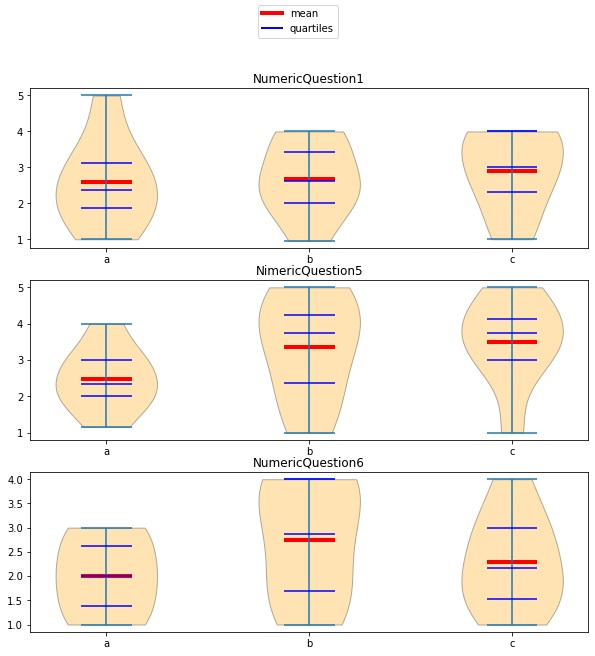

In [880]:
numerical_partial_database_B = extract_numerical_columns(partial_database_B)

# We want a plot for each numerical column
total_plots = len(list(numerical_partial_database_B.columns))

# We need to group data for the category and transpose the descriptive dataframe to proprerly plot it
databases = []
for column in numerical_partial_database_B.columns.to_list():
    databases.append(partial_database_B.groupby(['AlphanumericQuestion0'])\
                     [column].describe().transpose())

columns = numerical_partial_database_B.columns
    
# New Violin plot personalization
def personalize_violinplots_subset(dataframes, axes, titles):
    """
    Given a dataframe list and a list of matplotlib axes and titles
    creates a violinplot using different colours of each relevant element
    """
    for index, ax in enumerate(axes):
        quantiles_matrix = np.array([0.25, 0.50, 0.75])*\
                                        np.ones(
                                            (len(dataframes[index].columns.to_list()),
                                             3))
        violin_parts = ax.violinplot(dataframes[index], 
                              showmeans=True, showmedians=False, showextrema=True, 
                              quantiles= quantiles_matrix.tolist())
        
        plt.setp(violin_parts['cmeans'], edgecolor='red',lw=4)
        plt.setp(violin_parts['cquantiles'], edgecolor='blue')
        plt.setp(violin_parts['bodies'], facecolor='orange', edgecolor='black')
        ax.set_title(titles[index])
        # X lables position
        ax.set_xticks(range(1,len(dataframes[index].columns.to_list())+1,1))
        # X labels values
        ax.set_xticklabels(dataframes[index].columns.to_list())

        
fig, ax1 = plt.subplots(total_plots, 1, figsize=(max(len(\
                                    numerical_partial_database_B.columns.to_list()), max(numerical_partial_database_A.describe().max().max(),\
                                       numerical_partial_database_B.describe().max().max())),\
                                    max(numerical_partial_database_B.describe().max().max(),\
                                       numerical_partial_database_B.describe().max().max())))

personalize_violinplots_subset(databases, ax1, columns)

custom_legend = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_legend, ['mean', 'quartiles'], loc='upper center')

# Let's save the image
plt.savefig('ViolinDatasetBGroupByColumn.png', dpi=150)

## Sentiment analysis
<a id='sentiment'></a>

As stated in the opening lines, the aim of this template is a simple analysis of a survey dataset.
A proper sentiment analysis cannot be considered "simple" so it is out of the scope.
Maybe in a future i'll put there a link for a template for sentiment analysis, for the moment you should search somewere else.



**PLEASE** if you are interested in sentiment analysis search and learn somewere in the web and perform it, but **utntil you do not have proper competence in sentiment analysis avoid to try to think that "make some random plots is always better than nothing"**.


Puting random plot wich you and your target audience do not understan is not a good idea: in the best case the target audience will ask you for clarification and you won't be able to explain, or in another case the audience will understand that's a nonsense plot and you will never know, but at worst the audience will misunderstand somenthing because of the nonsense plot.


If you are not proficient in sentiment analysis and yor boss ask you for something like that, please do not try to make a simple plot of the frequences of all the worlds used just for make some plot, try to convince your boss that you need time to learn. 